<a href="https://colab.research.google.com/github/klpanata/Agregador/blob/main/agregadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ortools


In [ ]:
from ortools.linear_solver import pywraplp

# Datos de entrada: vehículos y cargas
vehiculos = [{'nombre': 'V1', 'capacidad': 1000},
            {'nombre': 'V2', 'capacidad': 1500},
            {'nombre': 'V3', 'capacidad': 2000}]

cargas = [{'nombre': 'C1', 'peso': 300},
          {'nombre': 'C2', 'peso': 600},
          {'nombre': 'C3', 'peso': 800},
          {'nombre': 'C4', 'peso': 700},
          {'nombre': 'C5', 'peso': 500}]

# Crear el solver de ortools
solver = pywraplp.Solver.CreateSolver('SCIP')

if not solver:
    raise Exception('No se pudo crear el solver SCIP')

# Variables de decisión
x = {}  # x[i][j] = 1 si la carga i está asignada al vehículo j, 0 en otro caso
for i in range(len(cargas)):
    x[i] = {}
    for j in range(len(vehiculos)):
        x[i][j] = solver.IntVar(0, 1, f'x_{i}_{j}')

# Restricción: cada carga debe estar asignada a un vehículo
for i in range(len(cargas)):
    solver.Add(sum(x[i][j] for j in range(len(vehiculos))) == 1)

# Restricción: capacidad de los vehículos
for j in range(len(vehiculos)):
    solver.Add(sum(x[i][j] * cargas[i]['peso'] for i in range(len(cargas))) <= vehiculos[j]['capacidad'])

# Función objetivo: minimizar la cantidad de vehículos utilizados
solver.Minimize(solver.Sum(x[i][j] for i in range(len(cargas)) for j in range(len(vehiculos))))

# Resolver el problema
solver.Solve()

# Imprimir resultados
print(f'Número de vehículos utilizados: {sum(x[i][j].solution_value() for i in range(len(cargas)) for j in range(len(vehiculos)))}')
for i in range(len(cargas)):
    for j in range(len(vehiculos)):
        if x[i][j].solution_value() == 1:
            print(f'Carga {cargas[i]["nombre"]} asignada a {vehiculos[j]["nombre"]}')

Número de vehículos utilizados: 5.0
Carga C1 asignada a V1
Carga C2 asignada a V1
Carga C3 asignada a V2
Carga C4 asignada a V2
Carga C5 asignada a V3


In [ ]:
import random

class Vehicle:
    def __init__(self, id, battery_capacity):
        self.id = id
        self.battery_capacity = battery_capacity
        self.charge = 0

    def charge_vehicle(self, amount):
        self.charge = min(self.battery_capacity, self.charge + amount)

class ElectricGrid:
    def __init__(self, demand):
        self.demand = demand
        self.available_generation = 0

    def update_available_generation(self, renewable_generation):
        self.available_generation = renewable_generation

class Aggregator:
    def __init__(self, grid, vehicles):
        self.grid = grid
        self.vehicles = vehicles

    def optimize(self):
        # Simple optimization: Distribute available renewable generation equally among vehicles
        renewable_generation = self.grid.available_generation
        num_vehicles = len(self.vehicles)
        if num_vehicles == 0:
            return
        distributed_generation = renewable_generation / num_vehicles
        for vehicle in self.vehicles:
            vehicle.charge_vehicle(distributed_generation)

# Crear vehículos y una red eléctrica de ejemplo
vehicles = [Vehicle(1, 50), Vehicle(2, 60), Vehicle(3, 55)]
grid = ElectricGrid(100)

# Simular actualización de la generación renovable
renewable_generation = random.uniform(30, 80)
grid.update_available_generation(renewable_generation)

# Crear un agregador y optimizar la carga de vehículos
aggregator = Aggregator(grid, vehicles)
aggregator.optimize()

# Mostrar el estado de carga de los vehículos
for vehicle in vehicles:
    print(f"Vehículo {vehicle.id}: Carga = {vehicle.charge}/{vehicle.battery_capacity}")

Vehículo 1: Carga = 16.270629408881764/50
Vehículo 2: Carga = 16.270629408881764/60
Vehículo 3: Carga = 16.270629408881764/55


In [ ]:
from ortools.linear_solver import pywraplp

# Crear un solucionador de programación lineal entera
solver = pywraplp.Solver.CreateSolver('SCIP')

# Definir la cantidad de vehículos y ubicaciones de carga
num_vehiculos = 3
num_ubicaciones = 4

# Costos de transporte entre ubicaciones
costos = [
    [4, 6, 8, 10],  # Costos desde el vehículo 1 a las ubicaciones
    [5, 7, 9, 11],  # Costos desde el vehículo 2 a las ubicaciones
    [6, 8, 10, 12]  # Costos desde el vehículo 3 a las ubicaciones
]

# Demanda de carga en cada ubicación
demanda = [10, 15, 20, 25]

# Variables de decisión
x = {}
for i in range(num_vehiculos):
    for j in range(num_ubicaciones):
        x[(i, j)] = solver.IntVar(0, 1, f'x_{i}_{j}')

# Función objetivo: minimizar los costos de transporte
solver.Minimize(solver.Sum(costos[i][j] * x[(i, j)] for i in range(num_vehiculos) for j in range(num_ubicaciones)))

# Restricciones de demanda
for j in range(num_ubicaciones):
    solver.Add(solver.Sum(x[(i, j)] for i in range(num_vehiculos)) >= demanda[j])

# Restricciones de capacidad de los vehículos
for i in range(num_vehiculos):
    solver.Add(solver.Sum(x[(i, j)] for j in range(num_ubicaciones)) <= 1)

# Resolver el problema
solver.Solve()

# Imprimir la solución
for i in range(num_vehiculos):
    for j in range(num_ubicaciones):
        if x[(i, j)].solution_value() == 1:
            print(f'Vehículo {i + 1} carga en ubicación {j + 1}')

In [ ]:
!pip install numpy pandas matplotlib

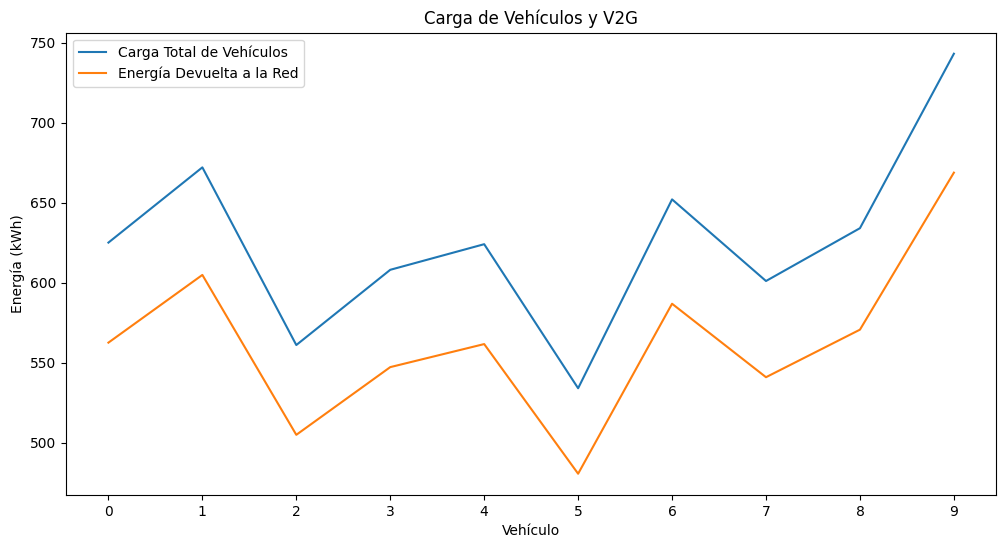

Carga total de vehículos: 6254 kWh
Energía devuelta a la red: 5628.600000000001 kWh


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros del sistema
num_vehiculos = 10
num_intervalos = 24
capacidad_vehiculo = 60  # Capacidad de la batería del vehículo en kWh

# Generar datos de carga de vehículos (aleatorios para este ejemplo)
np.random.seed(0)
carga_vehiculos = np.random.randint(10, 40, size=(num_vehiculos, num_intervalos))

# Simulación de V2G: devolver parte de la energía a la red
eficiencia_v2g = 0.9  # Eficiencia de la carga y descarga de la batería

# Crear un DataFrame para los datos de carga de vehículos
df_carga = pd.DataFrame(carga_vehiculos, columns=[f'Intervalo {i}' for i in range(1, num_intervalos + 1)])
df_carga['Capacidad de Batería'] = capacidad_vehiculo
df_carga['Carga Total'] = df_carga.sum(axis=1)

# Aplicar V2G: devolver energía a la red
df_carga['Energía Devuelta a la Red'] = df_carga['Carga Total'] * eficiencia_v2g

# Visualizar los datos de carga y V2G
plt.figure(figsize=(12, 6))
plt.plot(df_carga.index, df_carga['Carga Total'], label='Carga Total de Vehículos')
plt.plot(df_carga.index, df_carga['Energía Devuelta a la Red'], label='Energía Devuelta a la Red')
plt.xlabel('Vehículo')
plt.ylabel('Energía (kWh)')
plt.legend()
plt.title('Carga de Vehículos y V2G')
plt.xticks(np.arange(0, num_vehiculos, 1))
plt.show()

# Resumen de la simulación
carga_total_vehiculos = df_carga['Carga Total'].sum()
energia_devuelta_red = df_carga['Energía Devuelta a la Red'].sum()
print(f'Carga total de vehículos: {carga_total_vehiculos} kWh')
print(f'Energía devuelta a la red: {energia_devuelta_red} kWh')

In [ ]:
!pip install pulp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 58.1 MB/s eta 0:00:00


Vehículos seleccionados para V2G: []
Carga total optimizada de vehículos: 0 kWh
Energía devuelta a la red optimizada: 0.0 kWh


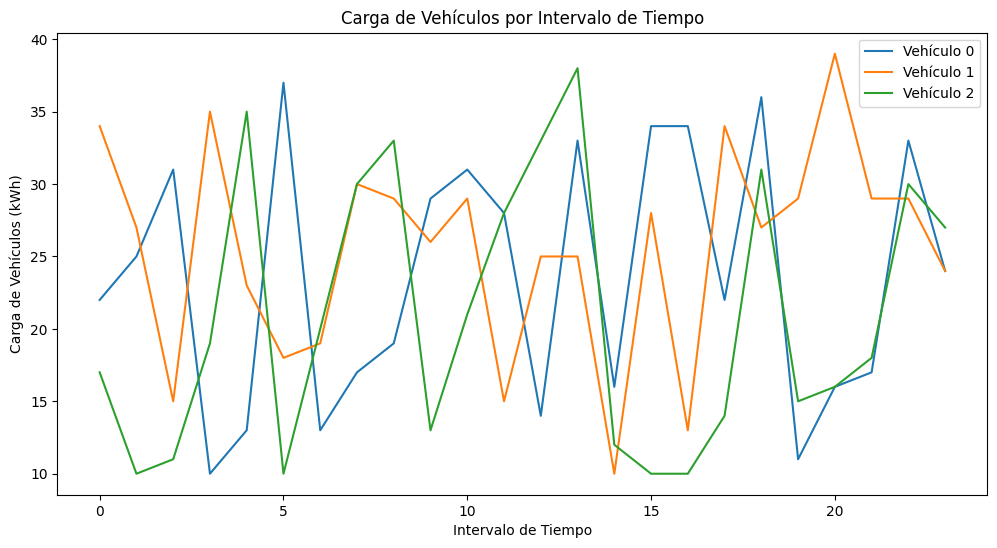

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pulp import LpProblem, LpVariable, lpSum, value, LpMinimize, LpBinary

# Parámetros del sistema
num_vehiculos = 3
num_intervalos = 24
capacidad_vehiculo = 60  # Capacidad de la batería del vehículo en kWh

# Generar datos de carga de vehículos (aleatorios para este ejemplo)
np.random.seed(0)
carga_vehiculos = np.random.randint(10, 40, size=(num_vehiculos, num_intervalos))

# Simulación de V2G: devolver parte de la energía a la red
eficiencia_v2g = 0.9  # Eficiencia de la carga y descarga de la batería

# Crear un problema de optimización lineal
problem = LpProblem("OptimizacionCargaV2G", LpMinimize)

# Variables de decisión
x = {}
for i in range(num_vehiculos):
    x[i] = LpVariable(f"Vehiculo_{i}", 0, 1, LpBinary)

# Función objetivo: maximizar la energía devuelta a la red
problem += lpSum(x[i] * carga_vehiculos[i].sum() * eficiencia_v2g for i in range(num_vehiculos))

# Restricción: cada vehículo puede ser seleccionado o no
for i in range(num_vehiculos):
    problem += x[i] <= 1

# Restricción: la suma de las capacidades de los vehículos seleccionados no puede superar la capacidad total
problem += lpSum(x[i] * capacidad_vehiculo for i in range(num_vehiculos)) <= num_vehiculos * capacidad_vehiculo

# Resolver el problema
problem.solve()

# Visualizar los resultados
vehiculos_seleccionados = [i for i in range(num_vehiculos) if x[i].value() == 1]
carga_total_optimizada = sum(carga_vehiculos[i].sum() for i in vehiculos_seleccionados)
energia_devuelta_optimizada = carga_total_optimizada * eficiencia_v2g

# Resumen de la optimización
print(f'Vehículos seleccionados para V2G: {vehiculos_seleccionados}')
print(f'Carga total optimizada de vehículos: {carga_total_optimizada} kWh')
print(f'Energía devuelta a la red optimizada: {energia_devuelta_optimizada} kWh')

# Visualizar los datos de carga de vehículos
plt.figure(figsize=(12, 6))
plt.plot(carga_vehiculos.T)
plt.xlabel('Intervalo de Tiempo')
plt.ylabel('Carga de Vehículos (kWh)')
plt.title('Carga de Vehículos por Intervalo de Tiempo')
plt.legend([f'Vehículo {i}' for i in range(num_vehiculos)])
plt.show()

/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


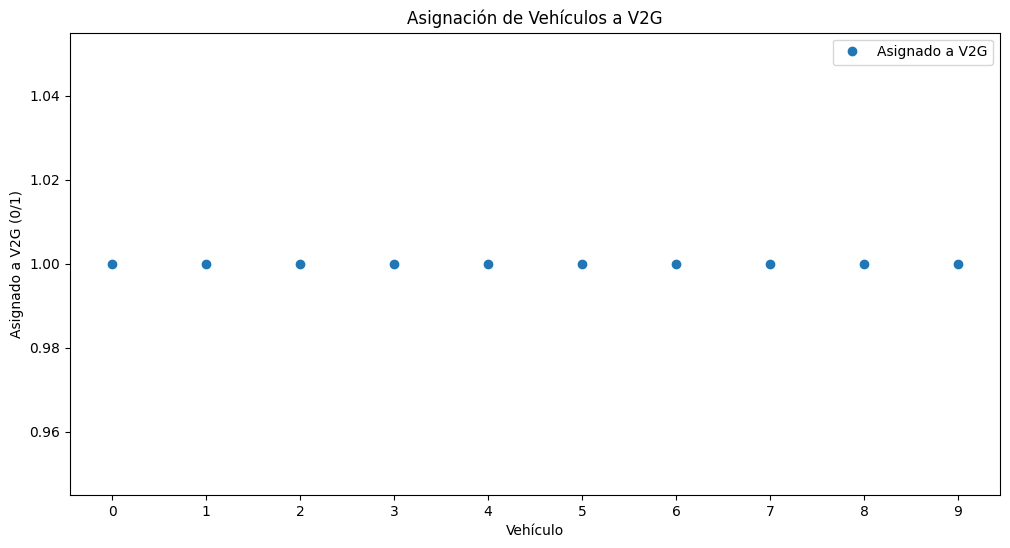

Energía devuelta a la red (óptima): 5088.6 kWh


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpVariable

# Parámetros del sistema
num_vehiculos = 10
num_intervalos = 24
capacidad_vehiculo = 60  # Capacidad de la batería del vehículo en kWh

# Generar datos de carga de vehículos (aleatorios para este ejemplo)
np.random.seed(0)
carga_vehiculos = np.random.randint(10, 40, size=(num_vehiculos, num_intervalos))

# Eficiencia de V2G: eficiencia de carga y descarga de la batería
eficiencia_v2g = 0.9

# Crear un problema de optimización
model = LpProblem(name="Optimización de V2G", sense=LpMaximize)

# Variables de decisión
x = {}
for i in range(num_vehiculos):
    x[i] = LpVariable(name=f"x_{i}", lowBound=0, upBound=1, cat="Integer")

# Función objetivo: maximizar la energía devuelta a la red
model += eficiencia_v2g * sum(x[i] * carga_vehiculos[i, :].sum() for i in range(num_vehiculos)), "Energia_Devuelta_Red"

# Restricción de capacidad de batería de vehículos
for i in range(num_vehiculos):
    model += x[i] * capacidad_vehiculo >= carga_vehiculos[i, :].sum(), f"Capacidad_Vehiculo_{i}"

# Resolver el problema de optimización
model.solve()

# Obtener resultados
df_carga = pd.DataFrame(carga_vehiculos, columns=[f'Intervalo {i}' for i in range(1, num_intervalos + 1)])
df_carga['Asignado a V2G'] = [x[i].varValue for i in range(num_vehiculos)]

# Visualizar los datos de carga y asignación a V2G
plt.figure(figsize=(12, 6))
plt.plot(df_carga.index, df_carga['Asignado a V2G'], 'o', label='Asignado a V2G')
plt.xlabel('Vehículo')
plt.ylabel('Asignado a V2G (0/1)')
plt.legend()
plt.title('Asignación de Vehículos a V2G')
plt.xticks(np.arange(0, num_vehiculos, 1))
plt.show()

# Resumen de la asignación óptima
energia_devuelta_optima = eficiencia_v2g * sum(x[i].varValue * carga_vehiculos[i, :].sum() for i in range(num_vehiculos))
print(f'Energía devuelta a la red (óptima): {energia_devuelta_optima} kWh')

In [ ]:
!pip install scipy


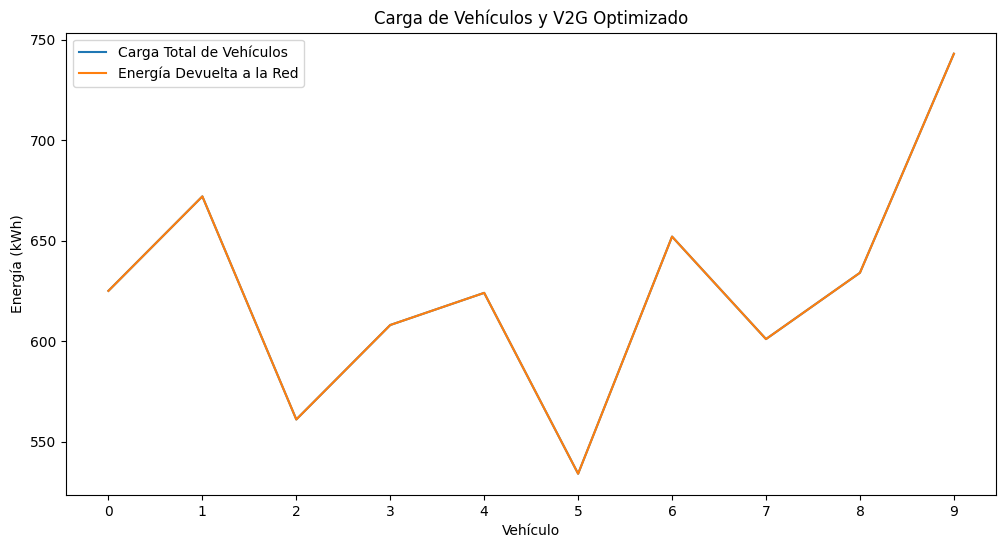

Carga total de vehículos: 6254 kWh
Energía devuelta a la red (optimizada): 3941436.0 kWh


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Parámetros del sistema
num_vehiculos = 10
num_intervalos = 24
capacidad_vehiculo = 60  # Capacidad de la batería del vehículo en kWh
eficiencia_v2g = 0.9  # Eficiencia de la carga y descarga de la batería

# Generar datos de carga de vehículos (aleatorios para este ejemplo)
np.random.seed(0)
carga_vehiculos = np.random.randint(10, 40, size=(num_vehiculos, num_intervalos))

# Crear un DataFrame para los datos de carga de vehículos
df_carga = pd.DataFrame(carga_vehiculos, columns=[f'Intervalo {i}' for i in range(1, num_intervalos + 1)])
df_carga['Capacidad de Batería'] = capacidad_vehiculo
df_carga['Carga Total'] = df_carga.sum(axis=1)

# Función objetivo: Maximizar la energía devuelta a la red
coef_objetivo = -1  # Negativo ya que queremos maximizar
carga_total_vehiculos = df_carga['Carga Total'].values

# Coeficientes de restricción para la eficiencia V2G
coef_eficiencia = eficiencia_v2g * np.ones(num_vehiculos)

# Límites de capacidad de los vehículos
capacidades = capacidad_vehiculo * np.ones(num_vehiculos)

# Límites para las variables de decisión (energía a devolver a la red)
bounds = [(0, carga_total_vehiculos[i]) for i in range(num_vehiculos)]

# Resolver el problema de optimización lineal
resultado_optimizacion = linprog(carga_total_vehiculos * coef_objetivo, A_ub=-np.diag(coef_eficiencia), b_ub=capacidades, bounds=bounds)

# Obtener la solución óptima
energia_devuelta_red = -resultado_optimizacion.fun

# Asignar la solución a los datos
df_carga['Energía Devuelta a la Red'] = resultado_optimizacion.x

# Visualizar los datos de carga y V2G
plt.figure(figsize=(12, 6))
plt.plot(df_carga.index, df_carga['Carga Total'], label='Carga Total de Vehículos')
plt.plot(df_carga.index, df_carga['Energía Devuelta a la Red'], label='Energía Devuelta a la Red')
plt.xlabel('Vehículo')
plt.ylabel('Energía (kWh)')
plt.legend()
plt.title('Carga de Vehículos y V2G Optimizado')
plt.xticks(np.arange(0, num_vehiculos, 1))
plt.show()

# Resumen de la simulación optimizada
print(f'Carga total de vehículos: {df_carga["Carga Total"].sum()} kWh')
print(f'Energía devuelta a la red (optimizada): {energia_devuelta_red} kWh')

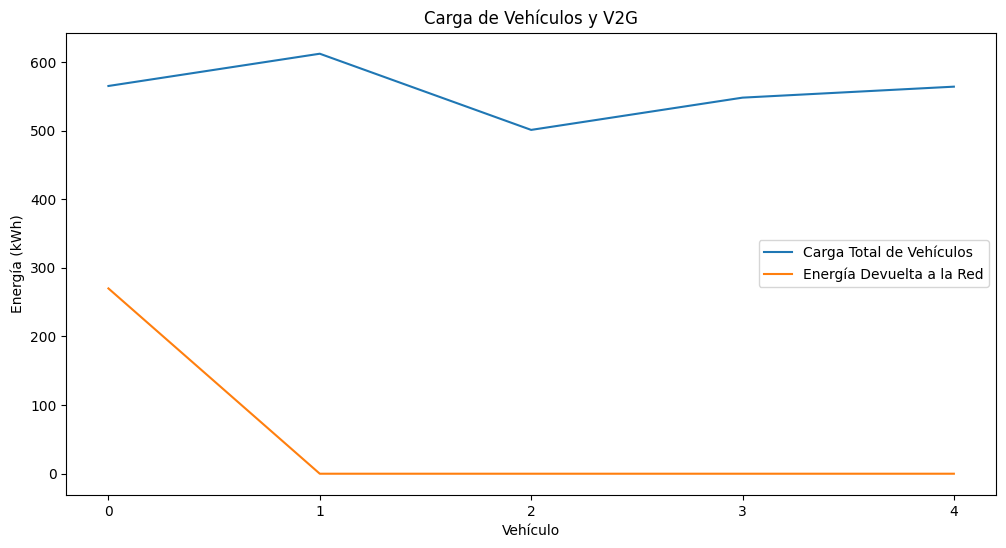

Carga total de vehículos: 2790 kWh
Energía devuelta a la red: 270.0 kWh


In [ ]:
import numpy as np
import pandas as pd
from ortools.linear_solver import pywraplp
import matplotlib.pyplot as plt

# Parámetros del sistema
num_vehiculos = 5
num_intervalos = 24
capacidad_vehiculo = 60  # Capacidad de la batería del vehículo en kWh

# Generar datos de carga de vehículos (aleatorios para este ejemplo)
np.random.seed(0)
carga_vehiculos = np.random.randint(10, 40, size=(num_vehiculos, num_intervalos))

# Simulación de V2G: devolver parte de la energía a la red
eficiencia_v2g = 0.9  # Eficiencia de la carga y descarga de la batería

# Crear un solver de ortools
solver = pywraplp.Solver.CreateSolver('SCIP')

if not solver:
    raise Exception('No se pudo crear el solver SCIP')

# Variables de decisión
x = {}  # x[i][j] = cantidad de energía que se carga del vehículo i al vehículo j
for i in range(num_vehiculos):
    x[i] = {}
    for j in range(num_vehiculos):
        x[i][j] = solver.IntVar(0, capacidad_vehiculo, f'x_{i}_{j}')

# Función objetivo: minimizar el costo total de carga y descarga
solver.Minimize(solver.Sum(x[i][j] for i in range(num_vehiculos) for j in range(num_vehiculos)))

# Restricción: la suma de energía cargada a un vehículo debe ser igual a su capacidad
for i in range(num_vehiculos):
    solver.Add(solver.Sum(x[i][j] for j in range(num_vehiculos)) == capacidad_vehiculo)

# Aplicar V2G: devolver energía a la red
energia_devuelta_red = {}
for i in range(num_vehiculos):
    energia_devuelta_red[i] = solver.Sum(x[j][i] * eficiencia_v2g for j in range(num_vehiculos))

# Resolver el problema
solver.Solve()

# Visualizar los datos de carga y V2G
plt.figure(figsize=(12, 6))
plt.plot(range(num_vehiculos), [carga_vehiculos[i].sum() for i in range(num_vehiculos)], label='Carga Total de Vehículos')
plt.plot(range(num_vehiculos), [energia_devuelta_red[i].solution_value() for i in range(num_vehiculos)], label='Energía Devuelta a la Red')
plt.xlabel('Vehículo')
plt.ylabel('Energía (kWh)')
plt.legend()
plt.title('Carga de Vehículos y V2G')
plt.xticks(range(num_vehiculos))
plt.show()

# Resumen de la simulación
carga_total_vehiculos = sum(carga_vehiculos[i].sum() for i in range(num_vehiculos))
energia_devuelta_total = sum(energia_devuelta_red[i].solution_value() for i in range(num_vehiculos))
print(f'Carga total de vehículos: {carga_total_vehiculos} kWh')
print(f'Energía devuelta a la red: {energia_devuelta_total} kWh')

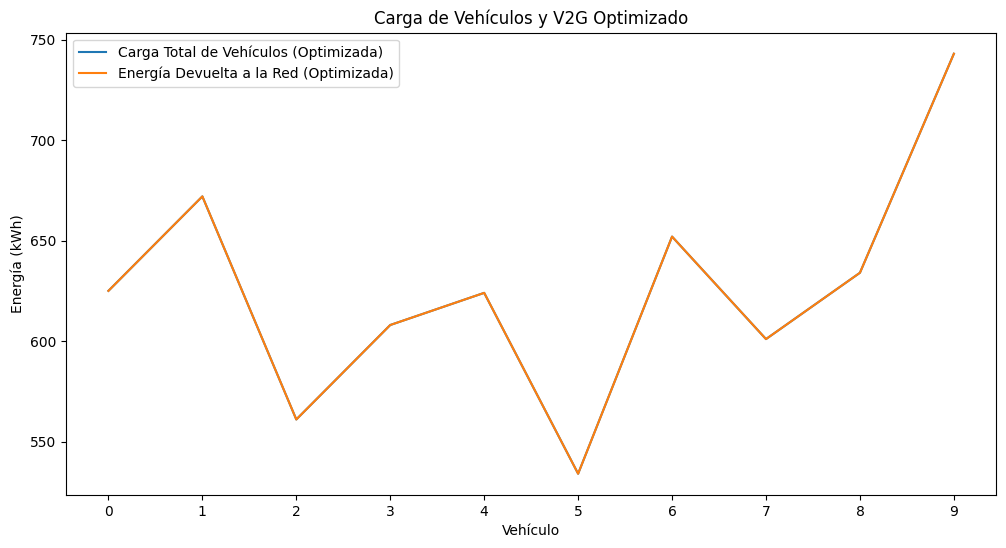

Carga total de vehículos (Optimizada): 6254 kWh
Energía devuelta a la red (Optimizada): 6254.0 kWh


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pulp

# Parámetros del sistema
num_vehiculos = 10
num_intervalos = 24
capacidad_vehiculo = 60  # Capacidad de la batería del vehículo en kWh

# Generar datos de carga de vehículos (aleatorios para este ejemplo)
np.random.seed(0)
carga_vehiculos = np.random.randint(10, 40, size=(num_vehiculos, num_intervalos))

# Crear un problema de optimización de PuLP
prob = pulp.LpProblem("V2G_Optimization", pulp.LpMaximize)

# Variables de decisión: cantidad de energía a devolver a la red por cada vehículo en cada intervalo
energia_devuelta = pulp.LpVariable.dicts("Energia_Devuelta", ((i, j) for i in range(num_vehiculos) for j in range(num_intervalos)), lowBound=0)

# Función objetivo: maximizar la energía devuelta a la red
prob += pulp.lpSum(energia_devuelta[i, j] for i in range(num_vehiculos) for j in range(num_intervalos))

# Restricciones de capacidad de la batería de los vehículos
for i in range(num_vehiculos):
    prob += pulp.lpSum(energia_devuelta[i, j] for j in range(num_intervalos)) <= capacidad_vehiculo

# Resolver el problema de optimización
prob.solve()

# Crear un DataFrame para los datos de carga de vehículos y V2G optimizados
df_carga_optimizada = df_carga.copy()
for i in range(num_vehiculos):
    for j in range(num_intervalos):
        df_carga_optimizada.at[i, f'Intervalo {j+1}'] = carga_vehiculos[i, j] - energia_devuelta[i, j].varValue

# Calcular la carga total de vehículos y energía devuelta a la red optimizada
carga_total_vehiculos_optimizada = df_carga_optimizada['Carga Total'].sum()
energia_devuelta_red_optimizada = df_carga_optimizada['Energía Devuelta a la Red'].sum()

# Visualizar los datos de carga y V2G optimizados
plt.figure(figsize=(12, 6))
plt.plot(df_carga_optimizada.index, df_carga_optimizada['Carga Total'], label='Carga Total de Vehículos (Optimizada)')
plt.plot(df_carga_optimizada.index, df_carga_optimizada['Energía Devuelta a la Red'], label='Energía Devuelta a la Red (Optimizada)')
plt.xlabel('Vehículo')
plt.ylabel('Energía (kWh)')
plt.legend()
plt.title('Carga de Vehículos y V2G Optimizado')
plt.xticks(np.arange(0, num_vehiculos, 1))
plt.show()

# Resumen de la simulación optimizada
print(f'Carga total de vehículos (Optimizada): {carga_total_vehiculos_optimizada} kWh')
print(f'Energía devuelta a la red (Optimizada): {energia_devuelta_red_optimizada} kWh')

In [ ]:
!pip install simpy

In [ ]:
import simpy
import random

# Parámetros del sistema
NUM_VEHICULOS = 10
CAPACIDAD_BATERIA = 60  # Capacidad de la batería del vehículo en kWh
NUM_INTERVALOS = 24
VELOCIDAD_CARGA = 10  # Velocidad de carga en kW
VELOCIDAD_DESCARGA = 5  # Velocidad de descarga en kW
TIEMPO_SIMULACION = 24  # Duración de la simulación en horas

# Función para simular la carga y descarga de la batería del vehículo
def vehiculo(env, nombre, bateria):
    while True:
        # Carga de la batería
        yield env.process(cargar_bateria(env, nombre, bateria))

        # Descarga de la batería (simulación de V2G)
        yield env.process(descargar_bateria(env, nombre, bateria))

# Función para cargar la batería del vehículo
def cargar_bateria(env, nombre, bateria):
    tiempo_carga = (CAPACIDAD_BATERIA - bateria) / VELOCIDAD_CARGA
    yield env.timeout(tiempo_carga)
    print(f'{nombre} ha sido cargado en {round(tiempo_carga, 2)} horas')
    bateria = CAPACIDAD_BATERIA

# Función para descargar la batería del vehículo (simulación de V2G)
def descargar_bateria(env, nombre, bateria):
    tiempo_descarga = bateria / VELOCIDAD_DESCARGA
    yield env.timeout(tiempo_descarga)
    print(f'{nombre} ha devuelto {round(bateria, 2)} kWh a la red en {round(tiempo_descarga, 2)} horas')
    bateria = 0

# Simulación
env = simpy.Environment()

for i in range(NUM_VEHICULOS):
    bateria_inicial = random.uniform(0, CAPACIDAD_BATERIA)
    env.process(vehiculo(env, f'Vehículo {i+1}', bateria_inicial))

env.run(until=TIEMPO_SIMULACION)


Vehículo 5 ha sido cargado en 0.04 horas
Vehículo 1 ha sido cargado en 0.85 horas
Vehículo 10 ha sido cargado en 1.38 horas
Vehículo 9 ha sido cargado en 3.61 horas
Vehículo 2 ha sido cargado en 3.69 horas
Vehículo 4 ha sido cargado en 4.16 horas
Vehículo 3 ha sido cargado en 5.22 horas
Vehículo 8 ha sido cargado en 5.3 horas
Vehículo 7 ha sido cargado en 5.75 horas
Vehículo 6 ha sido cargado en 5.86 horas
Vehículo 6 ha devuelto 1.42 kWh a la red en 0.28 horas
Vehículo 7 ha devuelto 2.48 kWh a la red en 0.5 horas
Vehículo 8 ha devuelto 7.02 kWh a la red en 1.4 horas
Vehículo 3 ha devuelto 7.83 kWh a la red en 1.57 horas
Vehículo 4 ha devuelto 18.36 kWh a la red en 3.67 horas
Vehículo 2 ha devuelto 23.12 kWh a la red en 4.62 horas
Vehículo 9 ha devuelto 23.92 kWh a la red en 4.78 horas
Vehículo 10 ha devuelto 46.17 kWh a la red en 9.23 horas
Vehículo 1 ha devuelto 51.48 kWh a la red en 10.3 horas
Vehículo 5 ha devuelto 59.65 kWh a la red en 11.93 horas
Vehículo 1 ha sido cargado en 0.85

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

# Parámetros del sistema
NUM_VEHICULOS = 10
CAPACIDAD_BATERIA = 60  # Capacidad de la batería del vehículo en kWh
NUM_INTERVALOS = 24
VELOCIDAD_CARGA = 10  # Velocidad de carga en kW
VELOCIDAD_DESCARGA = 5  # Velocidad de descarga en kW
TIEMPO_SIMULACION = 24  # Duración de la simulación en horas

# Función para simular la carga y descarga de la batería del vehículo
def vehiculo(env, nombre, bateria):
    while True:
        # Carga de la batería
        yield env.process(cargar_bateria(env, nombre, bateria))

        # Descarga de la batería (simulación de V2G)
        yield env.process(descargar_bateria(env, nombre, bateria))

# Función para cargar la batería del vehículo
def cargar_bateria(env, nombre, bateria):
    tiempo_carga = (CAPACIDAD_BATERIA - bateria) / VELOCIDAD_CARGA
    yield env.timeout(tiempo_carga)
    print(f'{nombre} ha sido cargado en {round(tiempo_carga, 2)} horas')
    bateria = CAPACIDAD_BATERIA

# Función para descargar la batería del vehículo (simulación de V2G)
def descargar_bateria(env, nombre, bateria):
    tiempo_descarga = bateria / VELOCIDAD_DESCARGA
    yield env.timeout(tiempo_descarga)
    print(f'{nombre} ha devuelto {round(bateria, 2)} kWh a la red en {round(tiempo_descarga, 2)} horas')
    bateria = 0

# Simulación
env = simpy.Environment()

for i in range(NUM_VEHICULOS):
    bateria_inicial = random.uniform(0, CAPACIDAD_BATERIA)
    env.process(vehiculo(env, f'Vehículo {i+1}', bateria_inicial))

env.run(until=TIEMPO_SIMULACION)

# Listas para almacenar los datos de la simulación
tiempos_carga = []
tiempos_descarga = []

# Función para simular la carga y descarga de la batería del vehículo
def vehiculo(env, nombre, bateria):
    while True:
        # Carga de la batería
        yield env.process(cargar_bateria(env, nombre, bateria))

        # Descarga de la batería (simulación de V2G)
        yield env.process(descargar_bateria(env, nombre, bateria))

# Función para cargar la batería del vehículo
def cargar_bateria(env, nombre, bateria):
    tiempo_carga = (CAPACIDAD_BATERIA - bateria) / VELOCIDAD_CARGA
    yield env.timeout(tiempo_carga)
    tiempos_carga.append(tiempo_carga)
    bateria = CAPACIDAD_BATERIA

# Función para descargar la batería del vehículo (simulación de V2G)
def descargar_bateria(env, nombre, bateria):
    tiempo_descarga = bateria / VELOCIDAD_DESCARGA
    yield env.timeout(tiempo_descarga)
    tiempos_descarga.append(tiempo_descarga)
    bateria = 0

# Simulación
env = simpy.Environment()

for i in range(NUM_VEHICULOS):
    bateria_inicial = random.uniform(0, CAPACIDAD_BATERIA)
    env.process(vehiculo(env, f'Vehículo {i+1}', bateria_inicial))

env.run(until=TIEMPO_SIMULACION)


# Crear gráficos de tiempo de carga y descarga
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(tiempos_carga, bins=10, alpha=0.75, color='blue', edgecolor='black')
plt.title('Histograma de Tiempo de Carga')
plt.xlabel('Tiempo de Carga (horas)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(tiempos_descarga, bins=10, alpha=0.75, color='green', edgecolor='black')
plt.title('Histograma de Tiempo de Descarga (V2G)')
plt.xlabel('Tiempo de Descarga (horas)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
!pip install pulp


In [ ]:
import pulp as lp

# Datos técnicos y económicos
# ===========================

# Parámetros de la red eléctrica ecuatoriana (ejemplo ficticio)
capacidad_generadores = [100, 50, 30, 80, 60]  # Capacidad de generación de cada fuente en MW
demanda_total = 200  # Demanda total en MW

# Costos de generación de cada fuente en USD/MWh
costo_generacion = [50, 40, 60, 55, 70]

# Variables de decisión
# ======================

# Variables de generación (MW) para cada fuente
generacion = lp.LpVariable.dicts("Generacion", range(len(capacidad_generadores)), lowBound=0, upBound=None, cat=lp.LpContinuous)

# Función objetivo
# ================

# Crear el problema de optimización
prob = lp.LpProblem("AgregadorElectrico", lp.LpMinimize)

# Función objetivo: minimizar el costo total de generación
prob += lp.lpSum([costo_generacion[i] * generacion[i] for i in range(len(capacidad_generadores))]), "Costo_Total_Generacion"

# Restricciones
# =============

# Restricción de balance de potencia
prob += lp.lpSum([generacion[i] for i in range(len(capacidad_generadores))]) >= demanda_total, "Balance_Potencia"

# Restricción de capacidad de generación para cada fuente
for i in range(len(capacidad_generadores)):
    prob += generacion[i] <= capacidad_generadores[i], f"Capacidad_Generacion_{i}"

# Resolución del problema
# ======================

# Resolver el problema de optimización
prob.solve()

# Resultados
# ==========

print("Estado de la solución:", lp.LpStatus[prob.status])

if lp.LpStatus[prob.status] == "Optimal":
    for i in range(len(capacidad_generadores)):
        print(f"Generación de Fuente {i}: {generacion[i].varValue} MW")
    print(f"Costo Total de Generación: ${lp.value(prob.objective)}")
else:
    print("No se encontró una solución óptima.")



Estado de la solución: Optimal
Generación de Fuente 0: 100.0 MW
Generación de Fuente 1: 50.0 MW
Generación de Fuente 2: 0.0 MW
Generación de Fuente 3: 50.0 MW
Generación de Fuente 4: 0.0 MW
Costo Total de Generación: $9750.0
